In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")
print('done')

done


In [2]:
##Unparameterized run
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs_05 = xr.open_dataset('static.nc', decode_times=False)
os_05 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_05 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


##TRUTH CASE:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
av_truth = xr.open_dataset('averages_00002702.nc', decode_times=False)  


%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2/
av_BS = xr.open_dataset('averages_00031502.nc', decode_times=False)
os_BS = xr.open_dataset('ocean.stats.nc', decode_times=False)

# %cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Bachman_EBT_test4/
# testEBT2 = xr.open_dataset('averages_00031502.nc', decode_times=False)
# ostestEBT2= xr.open_dataset('ocean.stats.nc', decode_times=False)


/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2


In [3]:
# ##Stratification comparison
# index=90
# Layer = np.array(os_05['Layer']);
# yh = av_05.yh
# xh = av_05.xh
# yh_hr=av_truth.yh

# h_05 = np.nanmean(np.array(av_05['h'][:,:,:,index]),axis=0)
# eta_05 = np.zeros((len(Layer)+1,280));


# h_truth = np.nanmean(np.array(av_truth['h'][:,:,:,index*16].coarsen(yh=16, boundary="exact").mean()),axis=0)
# eta_truth = np.zeros((len(Layer)+1,280));

# h_BS = np.nanmean(np.array(av_BS['h'][:,:,:,index]),axis=0)
# eta_BS = np.zeros((len(Layer)+1,280));



# for i in range(1,len(Layer)+1):
#     eta_05[i,:]=np.nansum(h_05[0:i,:],axis=0)
#     eta_truth[i,:]=np.nansum(h_truth[0:i,:],axis=0)
#     eta_BS[i,:]=np.nansum(h_BS[0:i,:],axis=0)

# print('done')

In [4]:
SSH_HR = (av_truth['h'][-1,:,:,:]).sum('zl')-(av_truth ['h'][:,:,:,:]).sum('zl').mean('time');
SSH_stdev_HR= SSH_HR.std('xh')

SSH_05 = (av_05['h'][-1,:,:,:]).sum('zl')-(av_05['h'][:,:,:,:]).sum('zl').mean('time');
SSH_stdev_05= SSH_05.std('xh')

SSH_BS = (av_BS['h'][-1,:,:,:]).sum('zl')-(av_BS['h'][:,:,:,:]).sum('zl').mean('time');
SSH_stdev_BS= SSH_BS.std('xh')

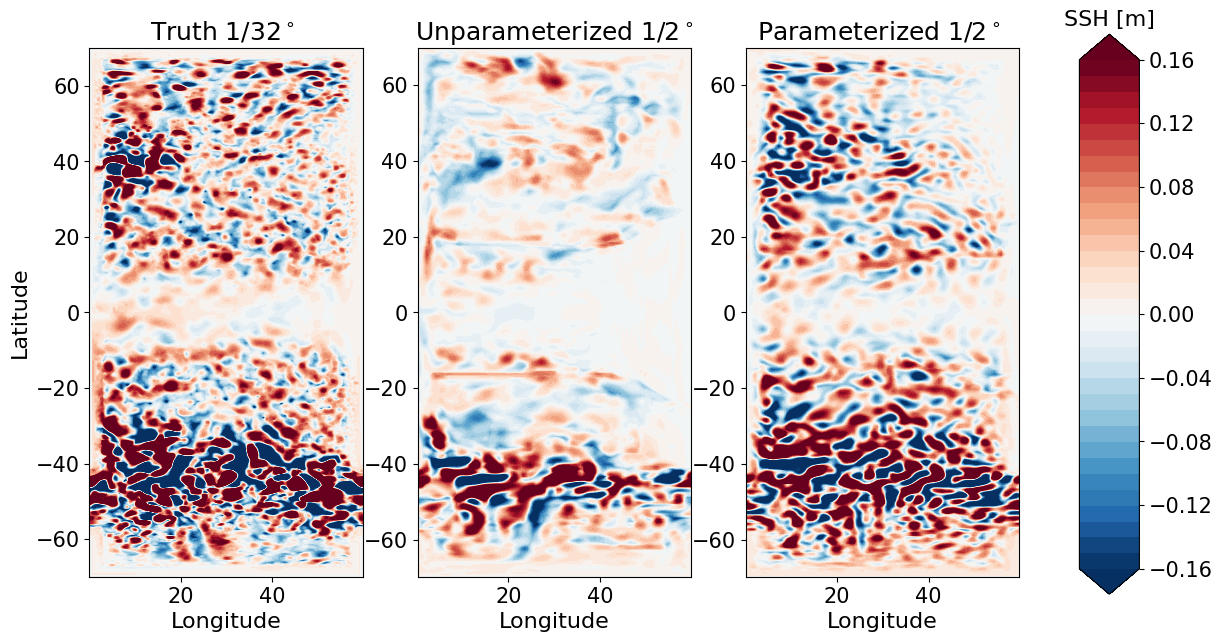

<Figure size 432x288 with 0 Axes>

In [12]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.

fig,ax=plt.subplots(3,figsize=(12, 7), facecolor='w', edgecolor='k',subplot_kw=dict(box_aspect=1),dpi=100)
#plt.tick_params(axis='both', which='major', labelsize=26)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.subplot(1,3,1)
levels=np.linspace(-.16,.16,33)
im =plt.contourf(SSH_HR.xh,SSH_HR.yh,(SSH_HR),levels=levels,cmap='RdBu_r',extend='both')
plt.title('Truth 1/32$^\circ$ ',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)


plt.subplot(1,3,2)
plt.contourf(SSH_05.xh,SSH_05.yh,(SSH_05),levels=levels,cmap='RdBu_r',extend='both')
plt.title('Unparameterized 1/2$^\circ$',fontsize=18)
plt.xlabel('Longitude',fontsize=16)



plt.subplot(1,3,3)

plt.contourf(SSH_BS.xh,SSH_BS.yh,(SSH_BS),levels=levels,cmap='RdBu_r',extend='both')
plt.title('Parameterized 1/2$^\circ$ ',fontsize=18)
plt.xlabel('Longitude',fontsize=16)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.10, 0.05, 0.8])
clb=fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('SSH [m]',fontsize=16)

plt.show()
 
plt.tight_layout()

Text(0, 0.5, 'Latitude')

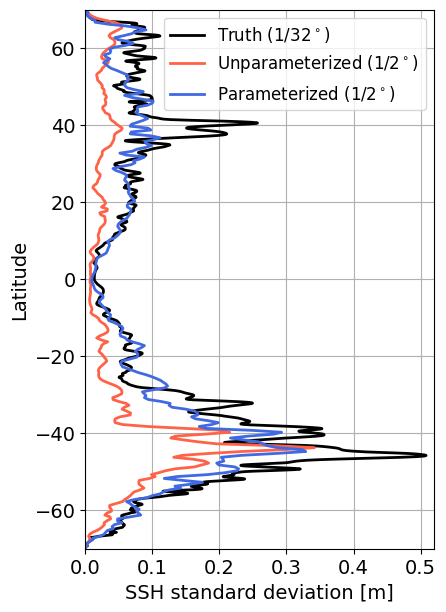

In [27]:
fig,ax=plt.subplots(1,figsize=(4.5, 7), facecolor='w', edgecolor='k',subplot_kw=dict(box_aspect=1),dpi=100)

plt.subplot(1,1,1)
plt.style.use('default')

plt.plot(SSH_stdev_HR,SSH_stdev_HR.yh,c='k',linewidth=2)
plt.plot(SSH_stdev_05,SSH_stdev_05.yh,c='tomato',linewidth=2)
plt.plot(SSH_stdev_BS,SSH_stdev_BS.yh,c='royalblue',linewidth=2)


plt.grid()

plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xlim(0, .52)
plt.ylim(-70,70);
plt.xlabel('SSH standard deviation [m]',fontsize=14)
plt.legend(['Truth (1/32$^\circ$)','Unparameterized (1/2$^\circ$)','Parameterized (1/2$^\circ$)'],loc='upper right',fontsize=12)#,handlelength=4)
plt.ylabel('Latitude',fontsize=14)

Text(0.5, 0, 'Latitude')

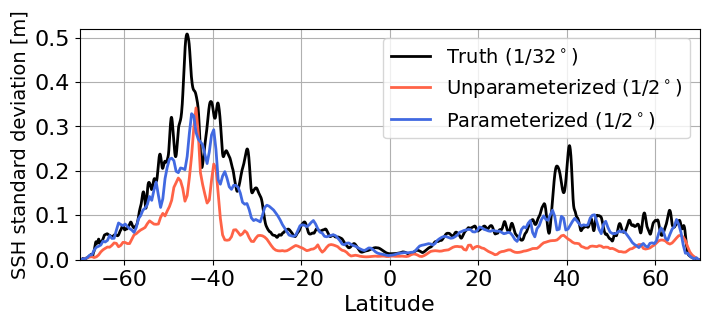

In [17]:
fig,ax=plt.subplots(1,figsize=(8, 3), facecolor='w', edgecolor='k',subplot_kw=dict(box_aspect=1),dpi=100)

plt.subplot(1,1,1)
plt.style.use('default')

plt.plot(SSH_stdev_HR.yh,SSH_stdev_HR,c='k',linewidth=2)
plt.plot(SSH_stdev_05.yh,SSH_stdev_05,c='tomato',linewidth=2)
plt.plot(SSH_stdev_BS.yh,SSH_stdev_BS,c='royalblue',linewidth=2)


plt.grid()

plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.ylim(0, .52)
plt.xlim(-70,70);
plt.ylabel('SSH standard deviation [m]',fontsize=14)
plt.legend(['Truth (1/32$^\circ$)','Unparameterized (1/2$^\circ$)','Parameterized (1/2$^\circ$)'],loc='upper right',fontsize=14)#,handlelength=4)
plt.xlabel('Latitude',fontsize=16)